In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2
from sklearn.model_selection import learning_curve

In [51]:

def random_forrest(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:np.array, y_test:np.array, target_encoder):
  """_summary_

  Args:
      X_train (_type_): _description_
      X_test (_type_): _description_
      y_train (_type_): _description_
      t_test (_type_): _description_
  """
  
  # Initialize the classifier
  classifier = RandomForestClassifier(random_state=42)

  # Train the classifier
  classifier.fit(X_train, y_train)

  # Predict on test data
  predictions = classifier.predict(X_test)

  # Evaluate the classifier
  print(classification_report(y_test, predictions, target_names=target_encoder.classes_))

def logistic_regression_analysis(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  
  logistic_regression = LogisticRegression(penalty='l1', solver='liblinear')

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")

def support_vector_machine(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (_type_): _description_
      X_test (_type_): _description_
      y_train (_type_): _description_
      y_test (_type_): _description_
  """
  
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  svm_pred = svm_model.predict(X_test)
  print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

def relu_model(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      df (pd.DataFrame): _description_
  """

  # Building the model
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
  model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 neurons
  model.add(Dense(1, activation='sigmoid'))  # Output layer

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {accuracy}")

In [27]:
df = pd.read_csv("nursery.csv")
df.columns = [col.strip() for col in df.columns]
df

,parents,has_nurs,form,children,housing,finance,social,health,Target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [33]:
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df.drop('Target', axis=1))

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Encode your target variable if it's categorical
target_encoder = LabelEncoder()
encoded_target = target_encoder.fit_transform(df['Target'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(encoded_df, encoded_target, test_size=0.2, random_state=42)

In [43]:
random_forrest(X_train, X_test, y_train, y_test, target_encoder)

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       870
    priority       0.99      0.99      0.99       873
   recommend       0.00      0.00      0.00         2
  spec_prior       0.99      1.00      0.99       785
  very_recom       0.96      0.87      0.92        62

    accuracy                           0.99      2592
   macro avg       0.79      0.77      0.78      2592
weighted avg       0.99      0.99      0.99      2592



/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [52]:
logistic_regression_analysis(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       0.86      0.90      0.88       873
           2       0.00      0.00      0.00         2
           3       0.90      0.92      0.91       785
           4       0.25      0.02      0.03        62

    accuracy                           0.92      2592
   macro avg       0.60      0.57      0.56      2592
weighted avg       0.90      0.92      0.91      2592

The Accuracy: 0.9185956790123457


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [48]:
support_vector_machine(X_train, X_test, y_train, y_test)

SVM Accuracy: 0.9992283950617284


In [53]:
relu_model(X_train, X_test, y_train, y_test)

Epoch 1/100
   1/1037 [..............................] - ETA: 3:49 - loss: 0.0000e+00 - accuracy: 0.3000

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1037/1037 [==============================] - 1s 437us/step - loss: 0.0000e+00 - accuracy: 0.3301
Epoch 2/100
1037/1037 [==============================] - 0s 429us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 3/100
1037/1037 [==============================] - 0s 433us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 4/100
1037/1037 [==============================] - 0s 426us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 5/100
1037/1037 [==============================] - 1s 490us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 6/100
1037/1037 [==============================] - 0s 481us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 7/100
1037/1037 [==============================] - 0s 474us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 8/100
1037/1037 [==============================] - 0s 469us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 9/100
1037/1037 [==============================] - 0s 418us/step - loss: 0.0000e+00 - accuracy: 0.3273
Epoch 10/100
1037/1037 [=======

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Users/test/miniforge3/envs/machine-learning-env/lib/python3.

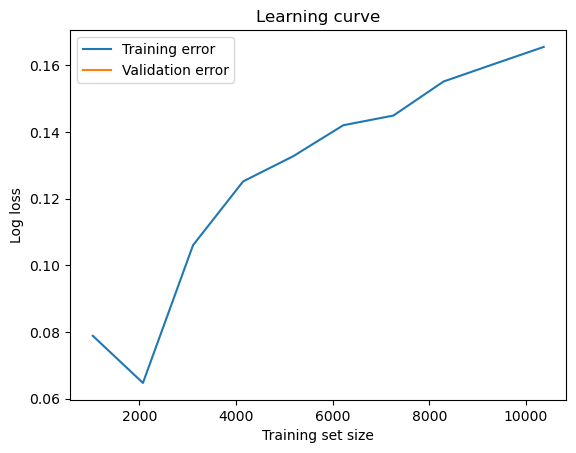

In [57]:


train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LogisticRegression(penalty='l1', solver='liblinear'),
    X = encoded_features, y = encoded_target, train_sizes = np.linspace(0.1, 1.0, 10), cv = 5,
    scoring = 'neg_log_loss')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Log loss')
plt.xlabel('Training set size')
plt.title('Learning curve')
plt.legend()
plt.show()